In [45]:
import sound
import scipy
from scipy.io import wavfile
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
#import librosa
audiofile = "Track16.wav"

font = {'family' : 'normal',
        'weight' : 'bold',
        'size': 16}
plt.rc('font', **font)

## Task1

In [85]:
audiofile = "Track16.wav"
binfile = "encoded8bit.bin"

fs, data = wavfile.read(audiofile)

data8bit = np.int8(data/(2**8))

size = pickle.dump(data8bit, open(binfile, "wb"), protocol=1)


In [91]:
audiofile = "Track16.wav"
binfile = "encoded8bit.bin"
decoded = "decoded8bit.wav"
rate = 16000

data8bit = pickle.load(open(binfile, "rb"), encoding='int8')
#sound.sound(data8bit, fs)
wavfile.write(decoded, rate=rate, data=data8bit)

In [90]:
fs8bitafterread, data8bitafterread = wavfile.read("decoded8bit.wav")

sound.sound(data8bitafterread, fs)

Stereo


In [69]:

def preparing(data, fs):
    duration = data.shape[0] / fs
    time_fragment = [duration/2 - 4, duration/2 + 4]
    samples_fragment = data[int(time_fragment[0]*fs):int(time_fragment[1]*fs)]
    max_value = float(samples_fragment.max())
    min_value = float(samples_fragment.min())
    samples_fragment_norm = (samples_fragment - min_value) / (max_value - min_value) 
    return time_fragment, samples_fragment_norm

In [95]:
time_fragment, samples_fragment = extract_8_seconds_from_the_middle(data, fs)
samples_fragment_norm = normilise_to_1(samples_fragment)

time_fragment8,samples_fragment8 = extract_8_seconds_from_the_middle(data8bitafterread, fs)
samples_fragment_norm8 = normilise_to_1(samples_fragment8)

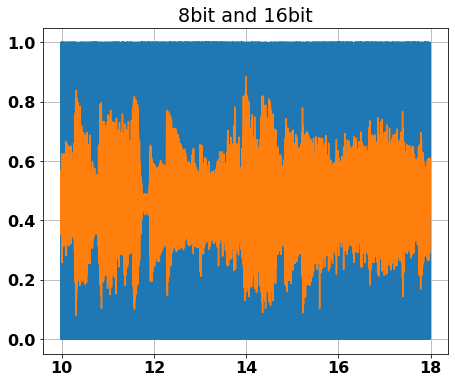

In [98]:
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot(121)
ax.plot(np.linspace(*time_fragment8, samples_fragment_norm8.shape[0]), samples_fragment_norm8[:, 0])
ax.plot(np.linspace(*time_fragment, samples_fragment_norm.shape[0]), samples_fragment_norm[:, 0])
ax.grid()

plt.title("8bit and 16bit")

plt.show()

In [72]:
def extract_8_seconds_from_the_middle(data, fs):
    duration = data.shape[0] / fs
    time_fragment = [duration/2 - 4, duration/2 + 4]
    samples_fragment = data[int(time_fragment[0]*fs):int(time_fragment[1]*fs)]
    return time_fragment, samples_fragment
def normilise_to_1(samples_fragment):
    max_value = float(samples_fragment.max())
    min_value = float(samples_fragment.min())
    samples_fragment_norm = (samples_fragment - min_value) / (max_value - min_value) 
    return samples_fragment_norm